In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime
import yfinance as yfin
yfin.pdr_override()
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm


In [2]:
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=3650)

# This function gets all the data for a ticker
def get_data(ticker):
    asset = pdr.get_data_yahoo(ticker, start = start_date, end = end_date)
    asset.reset_index(inplace = True) # To make the date a column
    return asset

tsla = get_data('TSLA')
tsla

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-10-07,12.164000,12.448667,12.017333,12.204667,12.204667,172284000
1,2013-10-08,12.293333,12.395333,11.547333,11.648667,11.648667,206358000
2,2013-10-09,11.648667,11.666000,10.766667,11.252000,11.252000,229747500
3,2013-10-10,11.539333,11.716667,11.312667,11.528667,11.528667,133258500
4,2013-10-11,11.516667,11.952667,11.413333,11.913333,11.913333,124666500
...,...,...,...,...,...,...,...
2509,2023-09-26,242.979996,249.550003,241.660004,244.119995,244.119995,101993600
2510,2023-09-27,244.259995,245.330002,234.580002,240.500000,240.500000,136597200
2511,2023-09-28,240.020004,247.550003,238.649994,246.380005,246.380005,117058900
2512,2023-09-29,250.000000,254.770004,246.350006,250.220001,250.220001,128346200


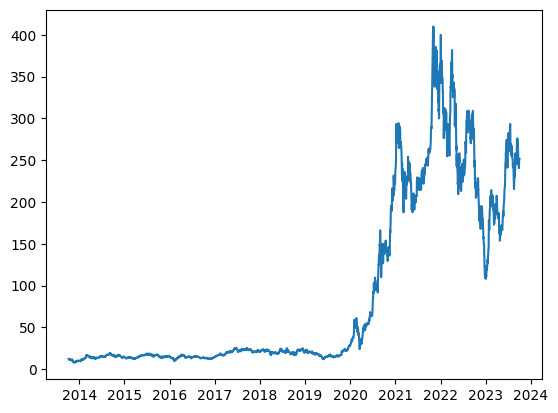

In [3]:
plt.plot(tsla['Date'], tsla['Adj Close'])
plt.show()

In [4]:
# This represents the historic log returns for the stock
log_returns = np.log(1 + tsla['Adj Close'].pct_change())
log_returns

0            NaN
1      -0.046627
2      -0.034646
3       0.024291
4       0.032821
          ...   
2509   -0.011688
2510   -0.014940
2511    0.024155
2512    0.015465
2513    0.005500
Name: Adj Close, Length: 2514, dtype: float64

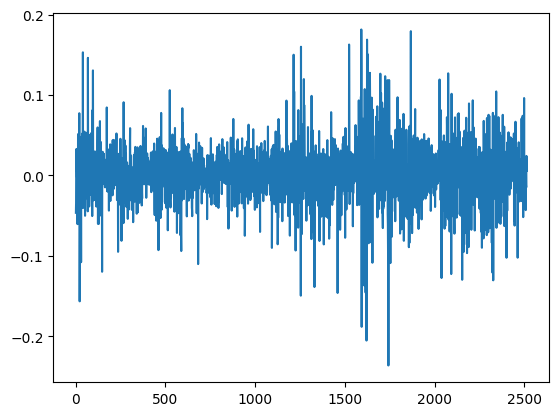

In [5]:
'''In the second plot, we plot the log returns, not the price, of TSLA.
The picture tells us the returns are normally distributed and have a stable mean'''
plt.plot(log_returns)
plt.show()

In [6]:
mu = log_returns.mean()
var = log_returns.var()
mu

0.001204147282939104

In [7]:
drift = mu - var/2
drift.dtype
type(drift)

numpy.float64

In [8]:
std_dev = log_returns.std()
type(std_dev)

numpy.float64

In [9]:
drift = np.array(drift)
type(drift)

numpy.ndarray

In [10]:
std_dev = np.array(std_dev)
std_dev

array(0.03539275)

In [11]:
norm.ppf(0.95)
#If an event has a 95% chance of occurring, the distance between this event and the mean will be approximately 1.65 standard deviations,

1.6448536269514722

In [12]:
''''We would like to specify the time intervals we will use will be 1,000,
because we are interested in forecasting the stock price for the upcoming 1,000 days
Then, to “iterations” I will attribute the value of 10, which means we will ask the
computer to produce 10 series of future stock price predictions'''
t_intervals = 1000
iterations = 10

In [13]:
daily_returns = np.exp(drift + std_dev * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.01927837, 1.01783694, 1.00301288, ..., 0.96748791, 0.99027608,
        1.01736986],
       [1.02113785, 0.99154349, 0.97077514, ..., 1.00953355, 1.02665813,
        1.00307978],
       [1.01979685, 0.99319305, 1.05212936, ..., 1.02062242, 0.99481696,
        0.98658602],
       ...,
       [0.99523346, 0.99673036, 1.01634916, ..., 1.01436033, 0.99631267,
        0.95453807],
       [0.99664337, 0.97046871, 1.03323793, ..., 1.02273675, 0.99072785,
        1.02754788],
       [1.00194878, 1.04015931, 1.04248655, ..., 0.95132739, 0.9778385 ,
        1.0124797 ]])

In [14]:
S0 = tsla.iloc[-1]['Adj Close']
S0

251.60000610351562

In [15]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
price_list[0] = S0
price_list

array([[251.6000061, 251.6000061, 251.6000061, ..., 251.6000061,
        251.6000061, 251.6000061],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]])

In [17]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

price_list

array([[ 251.6000061 ,  251.6000061 ,  251.6000061 , ...,  251.6000061 ,
         251.6000061 ,  251.6000061 ],
       [ 256.91829048,  249.47234861,  244.24703211, ...,  253.99864706,
         258.30719174,  252.37487975],
       [ 262.00446355,  247.77420159,  256.97947247, ...,  259.23671293,
         256.96837474,  248.98952924],
       ...,
       [ 114.86058578, 1538.06163388,  259.85599397, ...,  313.49483816,
        3080.65727824,  242.46985723],
       [ 114.47504102, 1492.6406962 ,  268.49306819, ...,  320.62269074,
        3052.09294984,  249.14938887],
       [ 114.69812746, 1552.58412198,  279.90041154, ...,  305.01714823,
        2984.45398761,  252.25869812]])

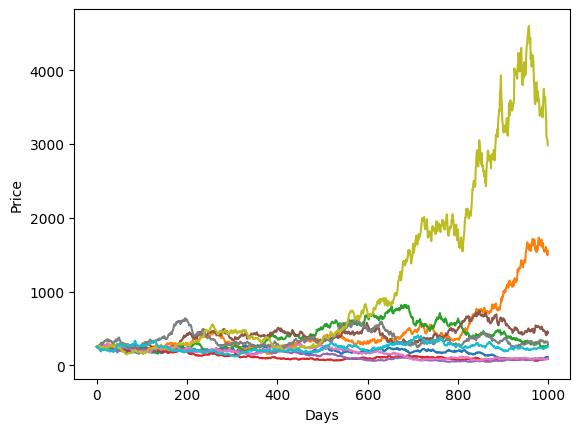

In [18]:
plt.plot(price_list)
plt.xlabel('Days')
plt.ylabel('Price')

plt.show()